### 
- put your symbol here such that its monthaly data should be in monthaly_data folder, then it will filter data with condition high% <= factor*median(high%)
- then it will find max sum profit can be in the timerange of data you provided and it will save that data in 'month_all_in_one_with_removing_outliers.csv' 


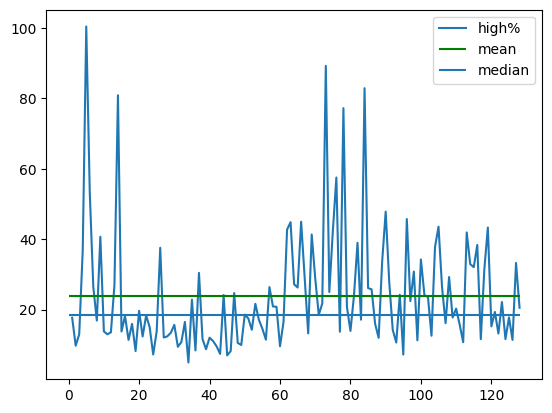

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
factor=1
symbol="SUZLON"
data=pd.read_csv(f"monthaly_data/{symbol}.csv")
length=len(data['year'])
x=np.arange(1,length+1,1)
high=data['HighPrice']
low=data['LowPrice']
close=data['ClosePrice']
open=data['OpenPrice']
highp=data['High%']
lowp=data['Low%']
closep=data['Close%']

targetp=data['target_wrt_h&l%']
average=np.average(targetp)
median=np.median(targetp)

plt.plot(x,targetp,label="high%")
plt.hlines(average,0,length,label="mean", colors="green")
plt.hlines(factor*median,0,length,label="median")
# plt.plot(x,lowp,label="low%")
# plt.plot(x,closep,label="close%")
plt.legend()
plt.show()



In [43]:
df=data[data['target_wrt_h&l%']<=median]
print(len(data['year']))
print(len(df['year']))
print(np.max(df['target_wrt_h&l%']))

128
64
18.353


In [45]:
df.to_csv(f"removed outliers/{symbol}.csv",index=False)

In [46]:
def prfdata(symbol,stploss,trgt):
    df1=pd.read_csv(f"removed outliers/{symbol}.csv")   
    df1['stploss']=df1['target_wrt_h&l%'].apply(lambda x:stploss)
    df1['trgt']=df1['target_wrt_h&l%'].apply(lambda x:trgt)
    df1['stploss']=pd.to_numeric(df1['stploss'])
    df1['trgt']=pd.to_numeric(df1['trgt'])

    df1.loc[((abs(df1['target_wrt_h&l%']) >= df1['trgt']) & ((abs(df1['profit_decider'])) < df1['stploss'])), 'profit'] = (df1['trgt']-df1['stploss'])
    df1.loc[(abs(df1['profit_decider']) >= df1['stploss']) , 'profit'] = -(2 * df1['stploss'])
    df1.loc[((abs(df1['target_wrt_h&l%']) < abs(df1['trgt'])) & ((abs(df1['profit_decider'])) < df1['stploss']) ) , 'profit'] = (abs(df1['Close%'])-df1['stploss'])
    df1['profit'] = pd.to_numeric(df1['profit'])

    profit = df1['profit'].sum()
    # print(f"Total profit = {profit}% in 2 years")
    data1 = df1.groupby(['year']).agg({"profit": "sum"})

    data = 1 + data1.values / 100
    overallprofit = 100 * data.cumprod()[-1:][0]
    formatted_overallprofit = "{:.4f}".format(overallprofit)
    # print(f"Total profit made in 2 years = {formatted_overallprofit}%")

    arr=[]

    for i in range(len(data1.values)):
        n=data1.values[i][0]
        arr.append(n)
    dic={"tprofit":profit,"cprofit":formatted_overallprofit,"data":data1}
    # df1.to_csv(f"monthaly_data/{symbol}.csv",index=False)
    
    return dic


In [47]:
def prfdata1(symbol,stploss,trgt):
    df1=pd.read_csv(f"removed outliers/{symbol}.csv")   
    df1['stploss']=df1['target_wrt_h&l%'].apply(lambda x:stploss)
    df1['trgt']=df1['target_wrt_h&l%'].apply(lambda x:trgt)
    df1['stploss']=pd.to_numeric(df1['stploss'])
    df1['trgt']=pd.to_numeric(df1['trgt'])

    df1.loc[((abs(df1['target_wrt_h&l%']) >= df1['trgt']) & ((abs(df1['profit_decider'])) < df1['stploss'])), 'profit'] = (df1['trgt']-df1['stploss'])
    df1.loc[(abs(df1['profit_decider']) >= df1['stploss']) , 'profit'] = -(2 * df1['stploss'])
    df1.loc[((abs(df1['target_wrt_h&l%']) < abs(df1['trgt'])) & ((abs(df1['profit_decider'])) < df1['stploss']) ) , 'profit'] = (abs(df1['Close%'])-df1['stploss'])
    df1['profit'] = pd.to_numeric(df1['profit'])

    profit = df1['profit'].sum()
    # print(f"Total profit = {profit}% in 2 years")
    data1 = df1.groupby(['year']).agg({"profit": "sum"})

    data = 1 + data1.values / 100
    overallprofit = 100 * data.cumprod()[-1:][0]
    formatted_overallprofit = "{:.4f}".format(overallprofit)
    # print(f"Total profit made in 2 years = {formatted_overallprofit}%")

    arr=[]

    for i in range(len(data1.values)):
        n=data1.values[i][0]
        arr.append(n)
    dic={"tprofit":profit,"cprofit":formatted_overallprofit,"data":data1}
    df1.to_csv(f"removed outliers/{symbol}.csv",index=False)
    
    return dic


In [48]:
stp = np.arange(0,10,0.01)
trgt =np.arange(0,50.1,0.1)
arr=[]
max=0
fstp=0
ftrgt=0
pmdata=[]
for estp in stp:
    print(estp)
    for etrgt in trgt:
        cc=prfdata(symbol,estp,etrgt)
        arr.append(cc['tprofit'])
        
        if(max<cc['tprofit']):            
            max=cc['tprofit']
            fstp=estp
            ftrgt=etrgt
            pmdata=cc['data']
            # print(f"{max}  {estp}  {etrgt} ")
prfdata1(symbol,fstp,ftrgt)
        
            


0.0
0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35000000000000003
0.36
0.37
0.38
0.39
0.4
0.41000000000000003
0.42
0.43
0.44
0.45
0.46
0.47000000000000003
0.48
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.5700000000000001
0.58
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.6900000000000001
0.7000000000000001
0.71
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.8
0.81
0.8200000000000001
0.8300000000000001
0.84
0.85
0.86
0.87
0.88
0.89
0.9
0.91
0.92
0.93
0.9400000000000001
0.9500000000000001
0.96
0.97
0.98
0.99
1.0
1.01
1.02
1.03
1.04
1.05
1.06
1.07
1.08
1.09
1.1
1.11
1.12
1.1300000000000001
1.1400000000000001
1.1500000000000001
1.16
1.17
1.18
1.19
1.2
1.21
1.22
1.23
1.24
1.25
1.26
1.27
1.28
1.29
1.3
1.31
1.32
1.33
1.34
1.35
1.36
1.37
1.3800000000000001
1.3900000000000001
1.4000000000000001
1.41
1.42
1.43
1.44
1.45
1.46
1.47
1.48
1.49
1.5
1.51
1.52
1.53
1.54
1.55
1.56
1.

{'tprofit': 9.43,
 'cprofit': '109.3115',
 'data':       profit
 year        
 2014   -0.14
 2015   -0.18
 2016   -0.20
 2017   -0.18
 2018   -0.14
 2019   -0.04
 2020   -0.06
 2021   -0.10
 2022   -0.06
 2023   10.61
 2024   -0.08}

In [49]:
maxc=(np.array(pmdata)/100+1).cumprod()[-1:][0]*100
dataf={"symbol":[symbol],"tprofit":[max],"cprofit":[maxc],"target":[ftrgt],"stoploss":[fstp]}
df23=pd.DataFrame(dataf)
df24=pd.read_csv("month_all_in_one_with_removing_outliers.csv")
df25=pd.concat([df24,df23])
df25.to_csv("month_all_in_one_with_removing_outliers.csv",index=False)

In [50]:

ddata=pd.read_csv(f"removed outliers/{symbol}.csv")
ddata["cumsum"]=ddata['profit'].cumsum()
ddata["cumprod"]=(ddata['profit']/100+1).cumprod()
ddata.to_csv(f"removed outliers/{symbol}.csv",index=False)